Today we will be working on the Amazon Books datset available at Kaggle link:https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books
This project was inspired from the yt channel Thu Vu analytics

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Regarding the link  the dataset isn't completely clean as some of the data has been lost check the csv file once

In [2]:
books=pd.read_csv(r"D:\ML(imp)\book dataset\final_book_dataset_kaggle2.csv")
books.head(10)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,NaN,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


First we check the relation between the average reviews and price whether more price leads to higher average reviews or the opposite

In [3]:
books.describe()
data=books.dtypes
data

title                            object
author                           object
price                           float64
price (including used books)     object
pages                            object
avg_reviews                     float64
n_reviews                        object
star5                            object
star4                            object
star3                            object
star2                            object
star1                            object
dimensions                       object
weight                           object
language                         object
publisher                        object
ISBN_13                          object
link                             object
complete_link                    object
dtype: object

In [4]:
print(books['price'].corr(books['avg_reviews'])) #It's an almost negligible negative correlation which doesn't tell us much

-0.032946101493107824


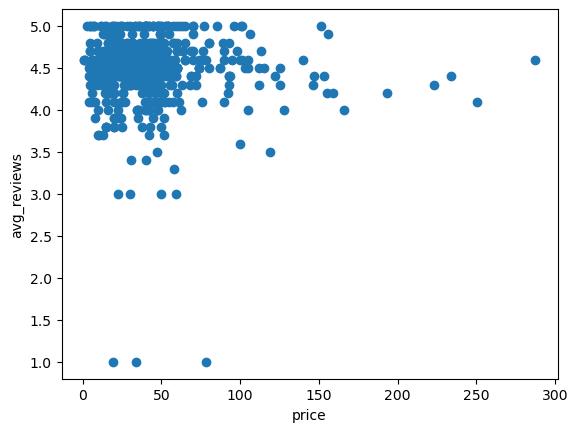

In [5]:
#We now plot this to observe it better
plt.scatter(books['price'],books['avg_reviews'])
plt.xlabel('price')
plt.ylabel('avg_reviews')
plt.show()

In [6]:
books.shape

(830, 19)

In [7]:
books.isna().sum()

title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [8]:
books.dropna(subset='n_reviews',inplace=True)

In [9]:
books.isna()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
827,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False


In [10]:
books.dropna(subset='pages',inplace=True)
rows_with_null=books[books['price'].isnull()]
names_of_rows = rows_with_null['title']
print(len(names_of_rows))

37


In [11]:
print(names_of_rows)#Name of the books whose names have removed the data around it

34     Python Programming for Beginners: Python Progr...
82     Python for Data Science: A Crash Course for Da...
105    Essential R For Data Analysis: Data manipulati...
164    PYTHON DATA ANALYTICS: Advanced and Effective ...
221    PYTHON ALGORITHMS: A Complete Guide to Learn P...
258    Python for Data Analysis: From the Beginner to...
306    Data Analytics, Data Visualization & Communica...
312    PYTHON FOR DATA ANALYSIS: Master the Basics of...
322    Python Data Analysis: Comprehensive Guide to D...
341    Introduction to Multivariate Data Analysis (Ea...
381    Python (2nd Edition): Learn Python in One Day ...
398    Python Workbook: Learn Python in one day and L...
404    Python for Absolute Beginners: Rocket through ...
408    Hands-On Python INTERMEDIATE: with 50 Exercise...
436    Python Mini Reference 2022: A Quick Guide to t...
449    Python: Programming Basics for Absolute Beginners
460            Colt's Python, King of the Seven Serpents
462    Python Programming for B

In [12]:
books.shape#After removing null values

(658, 19)

In [13]:
books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,Machine Learning with PyTorch and Scikit-Learn...,"[ Sebastian Raschka, Yuxi (Hayden) Liu, et al.]",39.02,39.02,774,4.6,164,80%,11%,4%,3%,3%,7.5 x 1.75 x 9.25 inches,2.88 pounds,English,"Packt Publishing (February 25, 2022)",978-1801819312,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
824,Data Science (The MIT Press Essential Knowledg...,NaN,9.69,9.69,280,4.5,404,67%,21%,7%,3%,2%,5 x 0.57 x 6.9 inches,8.8 ounces,English,"The MIT Press; Illustrated edition (April 13, ...",99,/Data-Science-Press-Essential-Knowledge/dp/026...,https://www.amazon.com/Data-Science-Press-Esse...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...


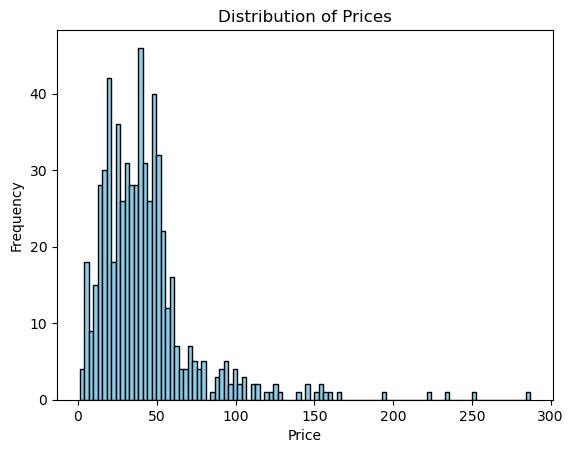

In [14]:
#Kaggle notebook referred to:https://www.kaggle.com/code/jacker01/amazon-data-science-books-eda
import matplotlib.pyplot as plt
plt.hist(books['price'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [15]:
median=books['price'].median()
books['price'].fillna(median,inplace=True)
books.isna().sum()

title                             0
author                          120
price                             0
price (including used books)     37
pages                             0
avg_reviews                       0
n_reviews                         0
star5                             0
star4                            65
star3                           144
star2                           246
star1                           363
dimensions                       78
weight                           77
language                          0
publisher                        33
ISBN_13                          73
link                              0
complete_link                     0
dtype: int64

In [16]:
books['n_reviews'] = books['n_reviews'].str.replace(',', '').astype(float)
books['avg_reviews'] = books['avg_reviews'].astype(float)
non_numeric_rows = books[books['pages'].str.replace('.', '', 1).str.isnumeric() == False]
books = books.drop(non_numeric_rows.index)
books['pages'] = books['pages'].astype(float)

C:\Users\PRATHAMESH MANDIYE\AppData\Local\Temp\ipykernel_17904\601753810.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  non_numeric_rows = books[books['pages'].str.replace('.', '', 1).str.isnumeric() == False]


Similarly let's see the pages vs price

In [17]:
print(books['pages'].corr(books['price']))#  correlation factor 

0.4275355469314456


We observe a significantly positive correlation factor but since a significant reduction was observed in the data we cannot as trongly talk about the correlation

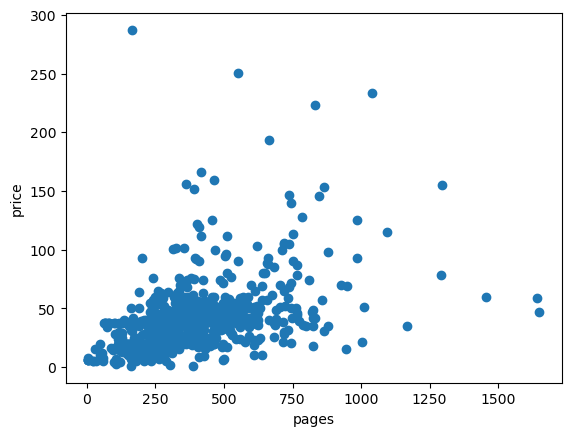

In [18]:
plt.scatter(books['pages'],books['price'])
plt.xlabel('pages')
plt.ylabel('price')
plt.show()#P.S make all graphs interactive

We can therefore see that usually as no. of pages increases the price also increases

Finding the best books:\
    Python\
    Machine Learning\
    Statistics

In [19]:
#Python
python_books=books[books['title'].str.contains("Python")]
best_python=python_books.nlargest(5,['n_reviews','avg_reviews'])
best_python

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
633,"Python Crash Course, 2nd Edition: A Hands-On, ...",[ Eric Matthes],23.99,23.99,544.0,4.7,7767.0,81%,13%,4%,1%,1%,NaN,NaN,"""Brilliant.""","No Starch Press; 2nd edition (May 21, 2019)",NaN,/Python-Crash-Course-Eric-Matthes-ebook/dp/B07...,https://www.amazon.com/Python-Crash-Course-Eri...
394,Python: - The Bible- 3 Manuscripts in 1 book: ...,NaN,27.97,27.97,375.0,4.3,4228.0,64%,16%,10%,4%,6%,6 x 0.85 x 9 inches,1.11 pounds,English,"Independently published (April 28, 2018)",978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
532,Python: For Beginners: A Crash Course Guide To...,[ Timothy C. Needham],13.66,13.66,135.0,4.3,3142.0,66%,16%,10%,3%,5%,6 x 0.31 x 9 inches,6.7 ounces,English,"Independently published (September 21, 2017)",66,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
61,"Automate the Boring Stuff with Python, 2nd Edi...",[ Al Sweigart],26.49,26.49,592.0,4.7,2672.0,82%,12%,3%,1%,1%,7 x 1.31 x 9.31 inches,3.53 ounces,English,"No Starch Press; 2nd edition (November 12, 2019)",-34%,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
32,Python for Everybody: Exploring Data in Python 3,"[ Charles R. Severance, Aimee Andrion, et al.]",0.99,0.99,387.0,4.6,2568.0,76%,16%,5%,2%,2%,NaN,NaN,English,NaN,NaN,/Python-Everybody-Exploring-Data-ebook/dp/B01I...,https://www.amazon.com/Python-Everybody-Explor...


Machine Learning Books

In [20]:
ml_books=books[books['title'].str.contains("Machine Learning")]
best_ml=ml_books.nlargest(5,['n_reviews','avg_reviews'])
best_ml

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
478,"Hands-On Machine Learning with Scikit-Learn, K...",[ Aurélien Géron],57.49,57.49,856.0,4.8,3129.0,85%,10%,3%,1%,2%,7 x 1.2 x 9.2 inches,2.8 pounds,English,"O'Reilly Media; 2nd edition (October 15, 2019)",978-1492032649,/Hands-Machine-Learning-Scikit-Learn-TensorFlo...,https://www.amazon.com/Hands-Machine-Learning-...
701,Machine Learning For Absolute Beginners: A Pla...,NaN,37.80,NaN,167.0,4.5,1123.0,68%,18%,8%,3%,2%,NaN,NaN,English,"Scatterplot Press; 2nd edition (June 21, 2017)",NaN,/Machine-Learning-Absolute-Beginners-Introduct...,https://www.amazon.com/Machine-Learning-Absolu...
717,The Hundred-Page Machine Learning Book,[ Andriy Burkov],31.99,26.50 - 31.99,160.0,4.6,839.0,80%,10%,4%,2%,3%,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,"Andriy Burkov (January 13, 2019)",978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
720,Pattern Recognition and Machine Learning (Info...,[ Christopher M. Bishop],105.22,90.99 - 105.22,738.0,4.6,687.0,76%,13%,6%,3%,2%,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Stat...,https://www.amazon.com/Pattern-Recognition-Lea...
678,Mathematics for Machine Learning,NaN,48.99,48.99,398.0,4.7,608.0,80%,13%,3%,2%,2%,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...


Statistics

In [21]:
stats_books=books[books['title'].str.contains("Statistics")]
best_stats=stats_books.nlargest(5,['n_reviews','avg_reviews'])
best_stats

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
659,The Art of Statistics: How to Learn from Data,[ David Spiegelhalter],17.99,17.99,448.0,4.6,2906.0,73%,19%,6%,1%,2%,5.5 x 1.25 x 8.5 inches,13.3 ounces,English,"Basic Books (August 17, 2021)",978-1541675704,/Art-Statistics-How-Learn-Data/dp/1541675703/r...,https://www.amazon.com/Art-Statistics-How-Lear...
50,Naked Statistics: Stripping the Dread from the...,NaN,1.69,8.99 - 11.69,304.0,4.6,2362.0,72%,19%,6%,2%,1%,5.5 x 0.8 x 8.2 inches,7.1 ounces,English,W. W. Norton & Company; 1st edition (January 1...,978-0393347777,/Naked-Statistics-Stripping-Dread-Data/dp/0393...,https://www.amazon.com/Naked-Statistics-Stripp...
701,Machine Learning For Absolute Beginners: A Pla...,NaN,37.80,NaN,167.0,4.5,1123.0,68%,18%,8%,3%,2%,NaN,NaN,English,"Scatterplot Press; 2nd edition (June 21, 2017)",NaN,/Machine-Learning-Absolute-Beginners-Introduct...,https://www.amazon.com/Machine-Learning-Absolu...
308,Practical Statistics for Data Scientists: 50+ ...,"[ Peter Bruce, Andrew Bruce, et al.]",31.90,31.9,368.0,4.6,736.0,77%,13%,6%,2%,2%,7 x 0.9 x 9.1 inches,1.3 pounds,English,"O'Reilly Media; 2nd edition (June 2, 2020)",978-1492072942,/Practical-Statistics-Data-Scientists-Essentia...,https://www.amazon.com/Practical-Statistics-Da...
720,Pattern Recognition and Machine Learning (Info...,[ Christopher M. Bishop],105.22,90.99 - 105.22,738.0,4.6,687.0,76%,13%,6%,3%,2%,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Stat...,https://www.amazon.com/Pattern-Recognition-Lea...


Cluster Analyis

In [22]:
from sklearn.feature_extraction .text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(1,2))
X=vectorizer.fit_transform(books['title'])

In [23]:
pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out()) #older versions use get_feature_names

,001,10,10 coding,10 essential,10 minutes,100,100 days,100 exam,100 exercises,100 techniques,...,young adults,young heart,young professionals,zed,zed shaw,zero,zero hero,zero pro,zipline,zipline python
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.cluster import KMeans
sum_of_dist_sq=[]
K=range(2,10)
for k in K:
    km=KMeans(n_clusters=k,max_iter=500,n_init=10,random_state=50)
    km.fit(X)
    sum_of_dist_sq.append(km.inertia_)

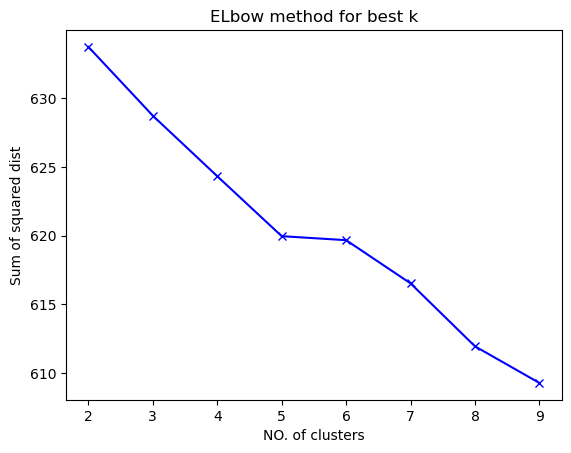

In [25]:
#Elbow method
plt.plot(K,sum_of_dist_sq,'bx-')
plt.xlabel('NO. of clusters')
plt.ylabel('Sum of squared dist')
plt.title('ELbow method for best k')
plt.show()

In [26]:
let_k=6
model=KMeans(n_clusters=let_k,init='k-means++',max_iter=500,n_init=10)
model.fit(X)

label=model.labels_
book_cl=pd.DataFrame(list(zip(books['title'],label)),columns=['title','cluster'])

In [27]:
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
0    Data Analysis Using R (Low Priced Edition): A ...        0
124  Regression Analysis with R: Design and develop...        0
128                          Analysis of Economic Data        0
129  Approximation Theory and Algorithms for Data A...        0
131  Probability and Computing: Randomization and P...        0
..                                                 ...      ...
491  Python Programming for Beginners: A Kid's Guid...        5
406  Bite-Size Python: An Introduction to Python Pr...        5
409  Python for Biologists: A complete programming ...        5
186  PYTHON ALGORITHMS: A Complete Guide to Learn P...        5
325  Python for Kids, 2nd Edition: A Playful Introd...        5

[651 rows x 2 columns]


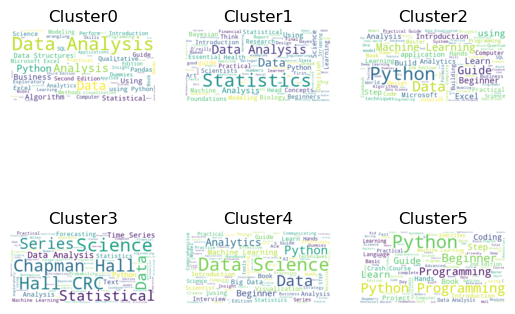

In [31]:
from wordcloud import WordCloud

for k in range(let_k):
    text=book_cl[book_cl.cluster==k]['title'].str.cat(sep=' ')
    wordcloud= WordCloud(max_font_size=50,max_words=100, background_color='white').generate(text)   
    
    
    plt.subplot(2,3,k+1).set_title('Cluster'+str(k))
    plt.plot()
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
plt.show()

Scraping Amazon Book reviews

In [33]:
def get_review_url(product_url):
    try:
        split_url=product_url.split('dp')
        product_num=split_url[1].split('/')[1]
        review_url=split_url[0] + 'product-reviews/' +product_num + '/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    except:
        review_url = None
    return review_url

In [34]:
books['review_urls']= books['complete_link'].apply(lambda x: get_review_url(x))

book_review=books.loc[~books['review_urls'].isnull()].reset_index()

In [35]:
book_review

,index,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,...,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,review_urls
0,0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500.0,4.4,23.0,55%,39%,...,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...,https://www.amazon.com/Data-Analysis-Using-Low...
1,1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484.0,4.3,124.0,61%,20%,...,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...,https://www.amazon.com/Head-First-Data-Analysi...
2,2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274.0,4.7,10.0,87%,13%,...,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547.0,4.6,1686.0,75%,16%,...,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368.0,3.9,12.0,52%,17%,...,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,814,Quantitative Social Science: An Introduction i...,"[ Kosuke Imai, and , Nora Webb Williams]",49.99,44.47 - 49.99,488.0,4.1,7.0,63%,18%,...,NaN,NaN,6.75 x 1 x 9.75 inches,2.25 pounds,English,"Princeton University Press (August 2, 2022)",,/Quantitative-Social-Science-Introduction-tidy...,https://www.amazon.com/Quantitative-Social-Sci...,https://www.amazon.com/Quantitative-Social-Sci...
518,819,Decolonizing Data: Unsettling Conversations ab...,[ Jacqueline M. Quinless],24.95,24.95,172.0,4.6,9.0,75%,11%,...,NaN,NaN,6 x 0.5 x 8.9 inches,10.2 ounces,English,"University of Toronto Press (February 15, 2022)",25,/Decolonizing-Data-Unsettling-Conversations-Re...,https://www.amazon.com/Decolonizing-Data-Unset...,https://www.amazon.com/Decolonizing-Data-Unset...
519,824,Data Science (The MIT Press Essential Knowledg...,NaN,9.69,9.69,280.0,4.5,404.0,67%,21%,...,3%,2%,5 x 0.57 x 6.9 inches,8.8 ounces,English,"The MIT Press; Illustrated edition (April 13, ...",99,/Data-Science-Press-Essential-Knowledge/dp/026...,https://www.amazon.com/Data-Science-Press-Esse...,https://www.amazon.com/Data-Science-Press-Esse...
520,825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208.0,4.5,74.0,72%,14%,...,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...,https://www.amazon.com/Deep-Learning-Engage-Wo...


In [36]:
#Do a sntiment analysis
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = book_review['review_urls']
book_titles = book_review['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': book_review['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

INFO:root:https://www.amazon.com/Data-Analysis-Using-Low-Priced/product-reviews/1685549594/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Head-First-Data-Analysis-statistics/product-reviews/0596153937/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Guerrilla-Analysis-Using-Microsoft-Excel/product-reviews/1615470743/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/product-reviews/1491957662/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Excel-Data-Analysis-Dummies-Computer/product-reviews/1119844428/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/SQL-Data-Analysis-Techniques-Transforming/product-reviews/1492088781/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Qualitative-Dat

In [37]:
book_reviews_all=pd.read_csv('book_reviews_2023-12-01-12.csv')
book_reviews_all

,review_text,review_stars,title
0,I am a prior IBM employee & retiree. I coded ...,5.0 out of 5 stars,Python Tricks: A Buffet of Awesome Python Feat...
1,I'm new to Python. This book clarified some f...,5.0 out of 5 stars,Python Tricks: A Buffet of Awesome Python Feat...
2,I consider myself an 'early intermediate' Pyth...,5.0 out of 5 stars,Python Tricks: A Buffet of Awesome Python Feat...
3,The main reason why I bought the book is becau...,4.0 out of 5 stars,Python Tricks: A Buffet of Awesome Python Feat...
4,I am not a big fan of reading books in general...,5.0 out of 5 stars,Python Tricks: A Buffet of Awesome Python Feat...
...,...,...,...
245,Great bookWhere can I find the source codes?,5.0 out of 5 stars,Machine Learning in Finance: From Theory to Pr...
246,[N.B.: this review is based on reading section...,3.0 out of 5 stars,Machine Learning in Finance: From Theory to Pr...
247,I never write a review but I felt obligated be...,3.0 out of 5 stars,Machine Learning in Finance: From Theory to Pr...
248,This book represents a very comprehensive guid...,5.0 out of 5 stars,Machine Learning in Finance: From Theory to Pr...


In [38]:
book_reviews_all['review_text'] = book_reviews_all['review_text'].astype(str)
book_reviews_agg = book_reviews_all.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
book_reviews_agg

,title,review_text
0,100 Days of Code Learning Journal: Notebook fo...,Great book. I only bought it for the calendar ...
1,Bayesian Artificial Intelligence (Chapman & Ha...,"Bayesian Artificial Intelligence, Second Editi..."
2,Be the Outlier: How to Ace Data Science Interv...,As someone who has budding interest in Data Sc...
3,"Becoming a Data Head: How to Think, Speak and ...","If you are new to the field, this book is a gr..."
4,Big Data Science in Finance,To anyone who is looking forward in knowing ho...
5,Coding for Kids: Python: Learn to Code with 50...,I bought this python book for my 10-year-old s...
6,Data Analysis for Continuous School Improvemen...,Victoria Bernhardt has hit a homerun with the ...
7,Data Science in Chemistry (De Gruyter Textbook),This compendium was due. On the one hand it pr...
8,Econometric Analysis of Cross Section and Pane...,This is a serious book for serious people. If...
9,Essential R For Data Analysis: Data manipulati...,I routinely do data analysis with R. While I a...
